## Start Exploring your Project

The ``Project`` object defined in ``radarly.project`` is an object storing informations about your project: dahsboards, social accounts recorded, queries, tags... It's the main object to explore to get all ids of object linked to your project (which can be used then to get specific response).

In [1]:
from radarly import RadarlyApi
from radarly.project import Project
RadarlyApi.init()

project = Project.find(pid=2989)
project

<Project.pid=2989.label=Luxury [OFFICIAL DEMO]>

``Project`` inherits from ``SourceModel`` so you can explore the structure with ``draw_structure`` method and then use the special method ``__getitem__``.

In [2]:
project.draw_structure(max_depth=1)

Project (Project)
| account_id (int)
| alcmeon_company (None)
| benchmark_entities (list[dict])
| brand_logos (list[int])
| client_reference (str)
| corpora (list[InfoCorpus])
| created (datetime)
| credentials (dict)
| dashboards (list[Dashboard])
| docs_count (int)
| docs_version (int)
| flags (dict)
| focuses (list[Focus])
| id (int)
| industries (list)
| label (str)
| limits (dict)
| milestones (list)
| mm3_id (None)
| out_of_reach_count (int)
| picture_id (int)
| platforms (list[str])
| project_manager_id (int)
| renew (None)
| research_manager_id (int)
| sinaweibo_options (dict)
| social_accounts (list[SocialAccount])
| social_wall_text (None)
| start (datetime)
| stop (datetime)
| tags (list[Tag])
| total_indexed_docs_count (int)
| updated (datetime)


In [3]:
print('ID of the project:'.ljust(30), project['id'])
print('Name of the project:'.ljust(30), project['label'])
print('Number of docs in the project:'.ljust(30), project['total_indexed_docs_count'])
print('Start date of the project:'.ljust(30), project['$.limits.start'])
print('End date of the project:'.ljust(30), project['$.limits.stop'])

ID of the project:             2989
Name of the project:           Luxury [OFFICIAL DEMO]
Number of docs in the project: 6679832
Start date of the project:     2017-12-31 23:00:00+00:00
End date of the project:       2019-01-01 22:59:59.999000+00:00


### Dashboards

As in the product Radarly, a ``Dashboard`` is an object used to group several focuses, social accounts inside your project. All the dashboards are stored in the ``Project`` object, in the ``dashboards`` attribute.

In [4]:
project.dashboards

[<Dashboard.id=10389.label=1. Watch Brands>,
 <Dashboard.id=10390.label=3. Watches types>,
 <Dashboard.id=11842.label=2. Community Management>,
 <Dashboard.id=11843.label=4. Consumers profiles>,
 <Dashboard.id=11844.label=5. Customer Experience>,
 <Dashboard.id=11883.label=3. Resellers>]

As most of qualitative objects, a ``Dashboard`` inherits from ``SourceModel`` and so, the structure can be explored with ``draw_structure``.

In [5]:
dashboard = project['$.dashboards(Management in label)']
dashboard.draw_structure(max_depth=2)

Dashboard (Dashboard)
 | benchmark_entities (list[int])
 | color (str)
 | created (datetime)
 | description (None)
 | focuses (list[int])
 | id (int)
 | is_emotional_map_activated (bool)
 | is_social_wall_activated (bool)
 | label (str)
 | milestones (list)
 | picture_id (int)
 | query_length (int)
 | social_accounts (dict)
 |  | facebook (list[str])
 |  | instagram (list[str])
 |  | linkedin (list)
 |  | sinaweibo (list)
 |  | twitter (list[str])
 |  | youtube (list)
 | updated (datetime)
 | views (list[dict])
 |  | dashboard_id (int)
 |  | id (str)
 |  | name (str)
 |  | position (int)
 |  | template (str)
 |  | tiles (list[dict])


Besides the usual ``id``, ``label`` and ``description``, we have in this object all the ids of several common object in Radarly. For example, here are some useful commands: 

In [6]:
# Get all the Instagram accounts'id registred in the dashboard.
print('Instagram Accounts:', dashboard['$.social_accounts.instagram'])
# Get all focuses'id in the dashboard
print('Focuses IDS:', dashboard.focuses)

Instagram Accounts: ['1292762063']
Focuses IDS: [134552]


The full objects can be found in the root level of the project. A ``Dashboard`` only stores the ID of the object contained in the dashboard; these objects can be found in the root level of your projects (some objects are detailed later in this tutorial). 

### Focuses (or Queries in the Radarly application)

A focus is a set of options used to specify which publications must be transfered from our database to your project. 
All the focuses of a project are stored in the ``focuses`` attributes of a project.

<div class="alert alert-info">
The terminology in Radarly application is slightly diffrent than those in the Python client. In the application, a focus is called "Query".
</div>

In [7]:
project.focuses

[<Focus.id=127597.label=Counterfeit - Rolex>,
 <Focus.id=127596.label=Resellers - Rolex (Watches)>,
 <Focus.id=111423.label=Omega>,
 <Focus.id=108276.label=Tag Heuer>,
 <Focus.id=108277.label=Jaeger-LeCoultre>,
 <Focus.id=108279.label=Rolex>,
 <Focus.id=108291.label=Smart Watch>,
 <Focus.id=108284.label=Automatic>,
 <Focus.id=108287.label=Quartz>,
 <Focus.id=108290.label=Mechanical>,
 <Focus.id=108294.label=TAG_Review>,
 <Focus.id=134330.label=Price (trigger)>,
 <Focus.id=134332.label=Ads & Campaigns>,
 <Focus.id=134331.label=Design>,
 <Focus.id=134552.label=Rolex (own)>,
 <Focus.id=108281.label=Breitling>]

This object also inherits from ``SourceModel`` so you can use ``draw_structure``.

In [8]:
focus = project.focuses[0]
focus.draw_structure(max_depth=2)

Focus (Focus)
 | activated (bool)
 | color (str)
 | created (datetime)
 | description (None)
 | filter (dict)
 |  | author (None)
 |  | categories (list)
 |  | corpora (list)
 |  | countries (list)
 |  | emoji (dict)
 |  | flag (dict)
 |  | focuses (list)
 |  | followers (None)
 |  | genders (list)
 |  | geo_area (None)
 |  | geo_filter (None)
 |  | has_children (None)
 |  | id (str)
 |  | in_relationship (None)
 |  | keywords (dict)
 |  | languages (list)
 |  | logos (list)
 |  | media (list)
 |  | occupations (list)
 |  | platforms (list)
 |  | query (None)
 |  | short_query (None)
 |  | sinaweibo_query (None)
 |  | tags (dict)
 |  | tones (list)
 |  | verified (None)
 | filter_id (str)
 | gnip_rate (int)
 | id (int)
 | is_dynamic (bool)
 | is_locked (bool)
 | is_pending (bool)
 | is_source (bool)
 | label (str)
 | parents (list)
 | picture_id (int)
 | project_id (int)
 | query_length (int)
 | updated (datetime)


All filters which configure the focus is stored in the ``filter`` attribute. When you want to get some publications which match this focus, you must give its id in the ``focuses`` field or in the ``fctx`` field of the payload.

### Tags

A tag can be used to add a label to a publication and so to categorize your publications in your project. It can contain several subvalues, called subtags in the client. When you want to restrict, for example, publications to match a specific tags, you must fill the ``tags.customFields`` field in the payload.

In [9]:
project.tags

[<Tag.label=Reviews.type=custom>, <Tag.label=A suivre.type=user>]

In [10]:
tag = project['$.tags(type=custom)']
tag.draw_structure()

Tag (Tag)
 | color (str)
 | created (datetime)
 | fixed_values (bool)
 | id (int)
 | label (str)
 | offset (int)
 | project_id (int)
 | single_value (bool)
 | subtags (list[dict])
 |  | color (str)
 |  | id (int)
 |  | value (str)
 | type (str)
 | updated (datetime)


In [11]:
tag['$.subtags.value']

['Review']

In [12]:
# The `tags.customFields` can be built with:
custom_fields = {
    tag['label']: tag['$.subtags.value']
}
custom_fields

{'Reviews': ['Review']}

### Social Accounts

Radarly gives you the opportunity to monitore several social accounts. They must be registred first into your project and will then be exposed in ``social_accounts`` of a ``Project`` object. 

In [13]:
project.social_accounts

[<SocialAccount.id=1375576302.platform=twitter>,
 <SocialAccount.id=284578421.platform=twitter>,
 <SocialAccount.id=41287444795.platform=facebook>,
 <SocialAccount.id=288607211258386.platform=facebook>,
 <SocialAccount.id=90884717210.platform=facebook>,
 <SocialAccount.id=UClJXNsEKylFoB4ae6tZ9z5Q.platform=youtube>,
 <SocialAccount.id=UCF0mZ8eOx3ie5yCErYRoT5A.platform=youtube>,
 <SocialAccount.id=6644206.platform=instagram>,
 <SocialAccount.id=1165531538.platform=instagram>,
 <SocialAccount.id=1292762063.platform=instagram>,
 <SocialAccount.id=6273255109.platform=sinaweibo>,
 <SocialAccount.id=3679459427.platform=sinaweibo>]

In [14]:
social_account = project.social_accounts[0]
social_account.draw_structure()

SocialAccount (SocialAccount)
 | created (datetime)
 | created_on_platform (datetime)
 | description (str)
 | geo_enabled (bool)
 | id (str)
 | lang (str)
 | location (str)
 | name (str)
 | platform (str)
 | profile_image_url (str)
 | protected (bool)
 | relation_type (str)
 | screen_name (str)
 | time_zone (str)
 | updated (datetime)
 | url (str)
 | verified (bool)


<div class="alert alert-info">
The structure changes depending on the platform of the social account.
</div>

The ``SocialAccount`` object stores informations like its url, its name (screen name and official name), its lang. The ``id`` or the ``screen_name`` can be used to retrieve publications linked to its social account.

ID of the account: 1375576302
Platform of the account: twitter
Official Name: IGIT
Link to the account: https://t.co/0jTCChncyq
Query to use to retrieve publications of this social account: user.twitter.id:1375576302
Profile Image: 


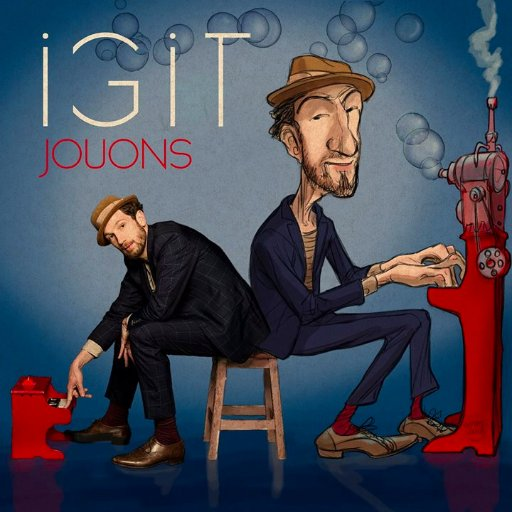

In [15]:
from IPython.display import Image
id, platform = social_account.id, social_account.platform
print('ID of the account:', id)
print('Platform of the account:', platform)
print('Official Name:', social_account.name)
print('Link to the account:', social_account.url)
print('Query to use to retrieve publications of this social account:', f'user.{platform}.id:{id}')
print('Profile Image: ')
Image(social_account.profile_image_url)

### Corpus

A corpus is a collection of various sources. It can be used as a filter anywhere in the listening section of your project. In a ``Project`` instance, all the corpora are stored in the ``corpora`` attributes as a ``InfoCorpus`` object. This object stored a tiny part of information available on a corpus (its id, label and creation_date...).

In [3]:
project.corpora

[<InfoCorpus.id=14286.name=Rolex>, <InfoCorpus.id=15684.name=Omega>]

In [5]:
info_corpus = project.corpora[0]
info_corpus.draw_structure()

InfoCorpus (InfoCorpus)
| created (datetime)
| id (int)
| is_public (bool)
| name (str)
| picture_id (None)
| pid (int)
| project_id (int)


To get all available data on a corpus, you can call the ``expand`` method. This method will perform a request to fetch our API and returns a ``Corpus`` object, storing all data on a corpus (all available data of ``InfoCorpus`` and all the social accounts of your corpus.

### Next step...

A ``Project`` has many other attributes than ``dashboards``, ``focuses``, ``tags`` or ``social_accounts`` but these four attributes are the most useful and used to configure payloads sent to the API. Once you have properly explored and understood the ``Project`` structure, you can go to the next step of this tutorial where you will perform your first publications' search inside your project.